<a href="https://colab.research.google.com/github/parthkohli92/Stock-Forecasting-Analysis/blob/main/Google_Stock_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import numpy as np 
import pandas as pd

In [71]:
df = pd.read_csv('GOOGLE.csv', index_col='date', parse_dates=True)
df.head()

,symbol,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
date,,,,,,,,,,,,,
2016-11-22 00:00:00+00:00,GOOG,768.27,776.9600,767.00,772.63,1593108,768.27,776.9600,767.00,772.63,1593108,0.0,1.0
2016-11-23 00:00:00+00:00,GOOG,760.99,768.2825,755.25,767.73,1478417,760.99,768.2825,755.25,767.73,1478417,0.0,1.0
2016-11-25 00:00:00+00:00,GOOG,761.68,765.0000,760.52,764.26,587421,761.68,765.0000,760.52,764.26,587421,0.0,1.0
2016-11-28 00:00:00+00:00,GOOG,768.24,779.5300,759.80,760.00,2188151,768.24,779.5300,759.80,760.00,2188151,0.0,1.0
2016-11-29 00:00:00+00:00,GOOG,770.84,778.5000,768.24,771.53,1616618,770.84,778.5000,768.24,771.53,1616618,0.0,1.0


In [72]:
import matplotlib.pyplot as plt
%matplotlib inline

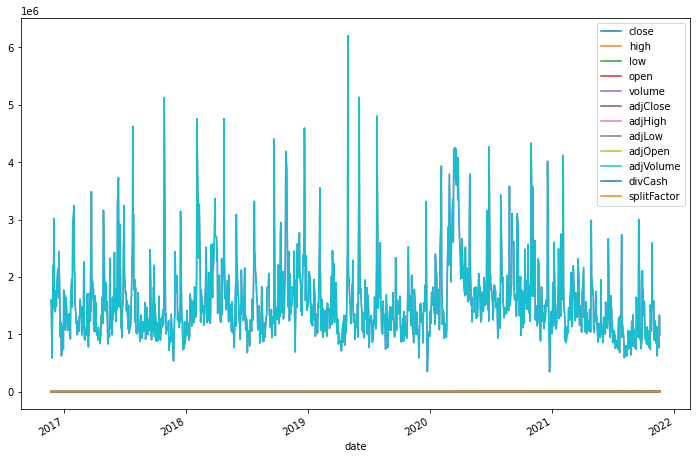

In [73]:
df.plot(figsize=(12,8))

In [74]:
df.drop(['divCash'],axis=1)

,symbol,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,splitFactor
date,,,,,,,,,,,,
2016-11-22 00:00:00+00:00,GOOG,768.27,776.9600,767.00,772.63,1593108,768.27,776.9600,767.00,772.63,1593108,1.0
2016-11-23 00:00:00+00:00,GOOG,760.99,768.2825,755.25,767.73,1478417,760.99,768.2825,755.25,767.73,1478417,1.0
2016-11-25 00:00:00+00:00,GOOG,761.68,765.0000,760.52,764.26,587421,761.68,765.0000,760.52,764.26,587421,1.0
2016-11-28 00:00:00+00:00,GOOG,768.24,779.5300,759.80,760.00,2188151,768.24,779.5300,759.80,760.00,2188151,1.0
2016-11-29 00:00:00+00:00,GOOG,770.84,778.5000,768.24,771.53,1616618,770.84,778.5000,768.24,771.53,1616618,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-15 00:00:00+00:00,GOOG,2987.76,3009.5400,2973.05,3000.00,812367,2987.76,3009.5400,2973.05,3000.00,812367,1.0
2021-11-16 00:00:00+00:00,GOOG,2981.52,2996.6500,2967.00,2983.41,862743,2981.52,2996.6500,2967.00,2983.41,862743,1.0
2021-11-17 00:00:00+00:00,GOOG,2981.24,2992.5200,2971.26,2984.58,764541,2981.24,2992.5200,2971.26,2984.58,764541,1.0


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2016-11-22 00:00:00+00:00 to 2021-11-19 00:00:00+00:00
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   close        1258 non-null   float64
 2   high         1258 non-null   float64
 3   low          1258 non-null   float64
 4   open         1258 non-null   float64
 5   volume       1258 non-null   int64  
 6   adjClose     1258 non-null   float64
 7   adjHigh      1258 non-null   float64
 8   adjLow       1258 non-null   float64
 9   adjOpen      1258 non-null   float64
 10  adjVolume    1258 non-null   int64  
 11  divCash      1258 non-null   float64
 12  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(1)
memory usage: 137.6+ KB


In [76]:
df=df[['high']]

In [77]:
df.tail()

,high
date,
2021-11-15 00:00:00+00:00,3009.54
2021-11-16 00:00:00+00:00,2996.65
2021-11-17 00:00:00+00:00,2992.52
2021-11-18 00:00:00+00:00,3032.20
2021-11-19 00:00:00+00:00,3037.00


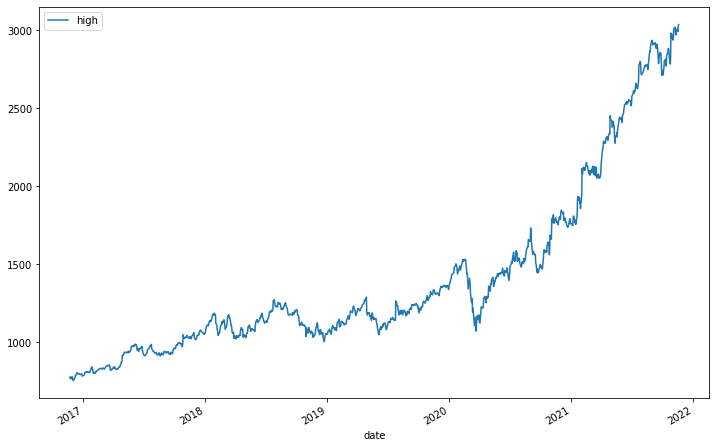

In [78]:
df.plot(figsize=(12,8))

In [79]:
len(df)

1258

In [80]:
train = df.iloc[:1058]
test = df.iloc[1058:]

In [81]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [82]:
df.head(), df.tail()

(                               high
 date                               
 2016-11-22 00:00:00+00:00  776.9600
 2016-11-23 00:00:00+00:00  768.2825
 2016-11-25 00:00:00+00:00  765.0000
 2016-11-28 00:00:00+00:00  779.5300
 2016-11-29 00:00:00+00:00  778.5000,                               high
 date                              
 2021-11-15 00:00:00+00:00  3009.54
 2021-11-16 00:00:00+00:00  2996.65
 2021-11-17 00:00:00+00:00  2992.52
 2021-11-18 00:00:00+00:00  3032.20
 2021-11-19 00:00:00+00:00  3037.00)

In [83]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [84]:
scaled_train[:10]

array([[0.01685138],
       [0.01048257],
       [0.00807339],
       [0.01873761],
       [0.01798165],
       [0.01393761],
       [0.00429358],
       [0.        ],
       [0.00726606],
       [0.0108844 ]])

Values are scaled bw 0 to 1 

In [85]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [86]:
# Define generator 
n_input = 3 
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train,length=n_input, batch_size=1)

In [87]:
print(len(scaled_train),len(generator))

1058 1055


Perfect!

In [88]:
X, y=generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.01685138 0.01048257 0.00807339]
Predict this y: 
 [[0.01873761]]


In [89]:
X, y=generator[1]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.01048257 0.00807339 0.01873761]
Predict this y: 
 [[0.01798165]]


In [90]:
X, y=generator[2]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.00807339 0.01873761 0.01798165]
Predict this y: 
 [[0.01393761]]


In [91]:
# we do the same thing but now for 12months
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train,length=n_input,  batch_size=1)

In [92]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [93]:
# Making model 
model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(n_input,n_features)))
model.add(Dense(1))

In [94]:
# Compiling the model 
model.compile(optimizer='adam',loss='mse')

In [95]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 200)               161600    
                                                                 
 dense_2 (Dense)             (None, 1)                 201       
                                                                 
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [113]:
# Fitting the model
model.fit(generator,epochs=25)

Epoch 1/25
1046/1046 [==============================] - 9s 9ms/step - loss: 3.8011e-04
Epoch 2/25
1046/1046 [==============================] - 9s 9ms/step - loss: 3.0282e-04
Epoch 3/25
1046/1046 [==============================] - 9s 9ms/step - loss: 3.1772e-04
Epoch 4/25
1046/1046 [==============================] - 9s 9ms/step - loss: 3.2306e-04
Epoch 5/25
1046/1046 [==============================] - 9s 9ms/step - loss: 3.0398e-04
Epoch 6/25
1046/1046 [==============================] - 9s 9ms/step - loss: 3.2135e-04
Epoch 7/25
1046/1046 [==============================] - 9s 9ms/step - loss: 2.9897e-04
Epoch 8/25
1046/1046 [==============================] - 9s 9ms/step - loss: 2.9900e-04
Epoch 9/25
1046/1046 [==============================] - 9s 9ms/step - loss: 2.9273e-04
Epoch 10/25
1046/1046 [==============================] - 9s 9ms/step - loss: 2.6554e-04
Epoch 11/25
1046/1046 [==============================] - 9s 9ms/step - loss: 2.7686e-04
Epoch 12/25
1046/1046 [==================

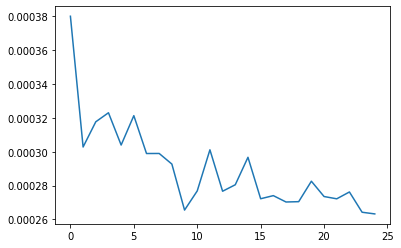

In [116]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [118]:
last_train_batch = scaled_train[-12:]

In [119]:
last_train_batch =last_train_batch.reshape((1,n_input,n_features))

In [120]:
model.predict(last_train_batch)

array([[0.99299634]], dtype=float32)

In [121]:
scaled_test[0]

array([1.00517204])

In [122]:
scaled_test[1]

array([0.99165505])

In [123]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [124]:
test_predictions[:10]

[array([0.99299634], dtype=float32),
 array([1.0061067], dtype=float32),
 array([1.0183841], dtype=float32),
 array([1.0315396], dtype=float32),
 array([1.0453749], dtype=float32),
 array([1.0599171], dtype=float32),
 array([1.075239], dtype=float32),
 array([1.0914098], dtype=float32),
 array([1.1084406], dtype=float32),
 array([1.1264287], dtype=float32)]

In [125]:
test.head()

,high,Predictions
date,,
2021-02-08 00:00:00+00:00,2123.5469,2117.211899
2021-02-09 00:00:00+00:00,2105.1300,2133.755458
2021-02-10 00:00:00+00:00,2108.3700,2151.256824
2021-02-11 00:00:00+00:00,2102.0300,2170.006733
2021-02-12 00:00:00+00:00,2108.8200,2189.993654


In [126]:
true_predictions = scaler.inverse_transform(test_predictions)

In [127]:
test['Predictions'] = true_predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


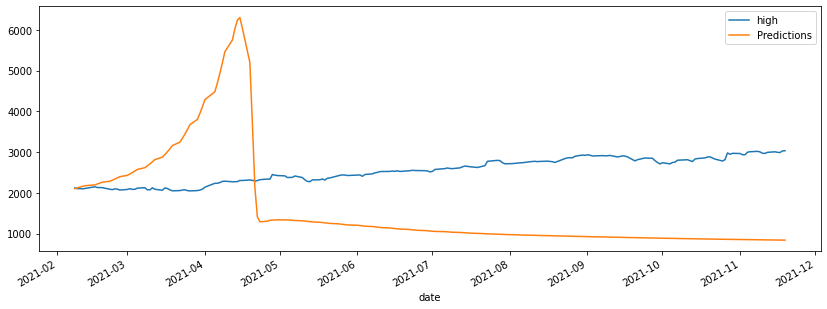

In [128]:
test.plot(figsize=(14,5))

In [129]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['high'],test['Predictions']))
print(rmse)

1712.0459423962905
